![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [16]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [17]:
# columns 

penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [18]:
# DUmmy variables 

penguins_df = pd.get_dummies(penguins_df, dtype='int')

print(penguins_df) 

print(penguins_df.info())

     culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0                39.1             18.7  ...           0         1
1                39.5             17.4  ...           1         0
2                40.3             18.0  ...           1         0
3                36.7             19.3  ...           1         0
4                39.3             20.6  ...           0         1
..                ...              ...  ...         ...       ...
327              47.2             13.7  ...           1         0
328              46.8             14.3  ...           1         0
329              50.4             15.7  ...           0         1
330              45.2             14.8  ...           1         0
331              49.9             16.1  ...           0         1

[332 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------

In [19]:
# Exploring for variance 

print(penguins_df.var())

culmen_length_mm         29.729343
culmen_depth_mm           3.842680
flipper_length_mm       197.008481
body_mass_g          650218.509992
sex_FEMALE                0.250746
sex_MALE                  0.250746
dtype: float64


In [20]:
# Scaling the data 

scaler = StandardScaler()

penguins_scaled = pd.DataFrame(scaler.fit_transform(penguins_df), columns=penguins_df.columns)

print(penguins_scaled.var())

culmen_length_mm     1.003021
culmen_depth_mm      1.003021
flipper_length_mm    1.003021
body_mass_g          1.003021
sex_FEMALE           1.003021
sex_MALE             1.003021
dtype: float64


In [21]:
# Elbow Analysis 

inertia = [] 

for k in range(1, 10): 
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_scaled)
    inertia.append(kmeans.inertia_) 
        

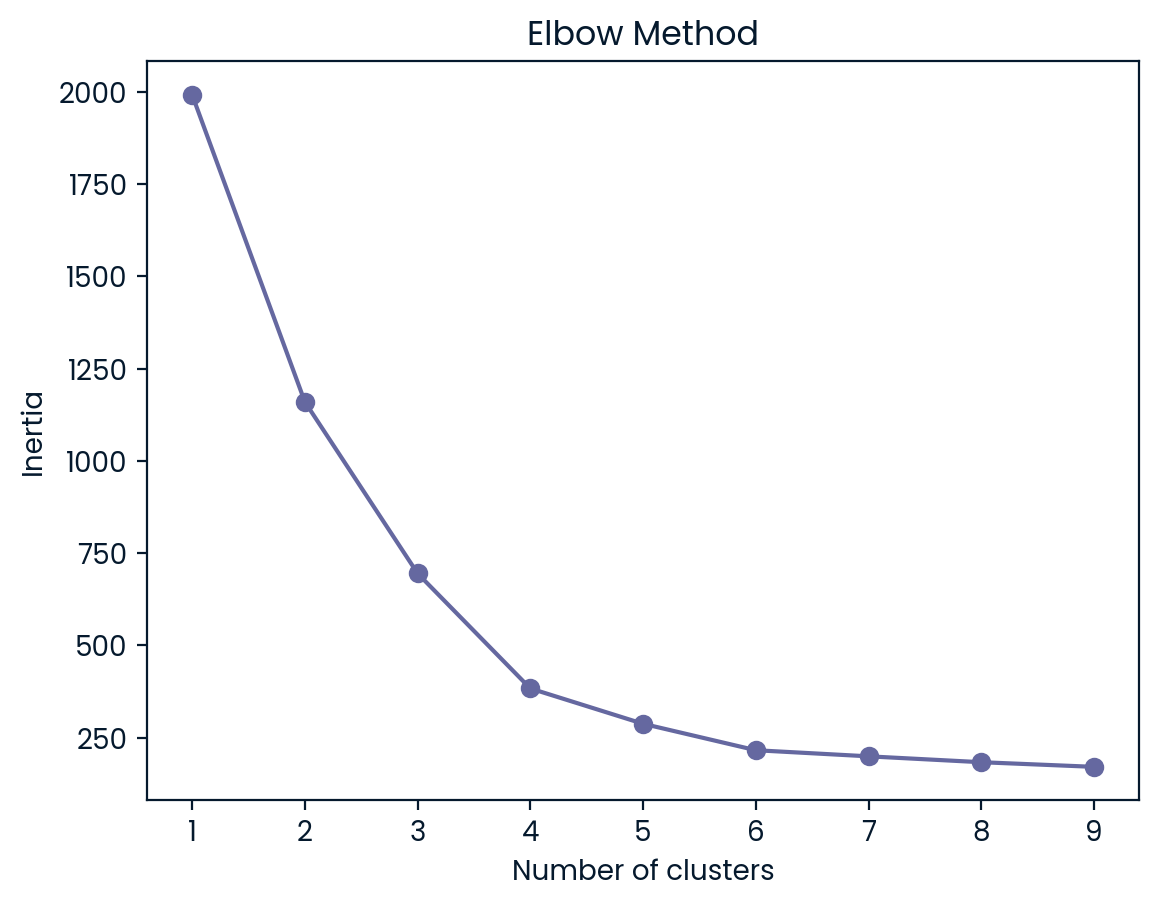

In [22]:
# Plotting Inertias 

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.title('Elbow Method')
plt.show()
n_clusters = 4

In [23]:
# Run KMeans Algorithm 

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_scaled) 
penguins_df['label'] = kmeans.labels_ 


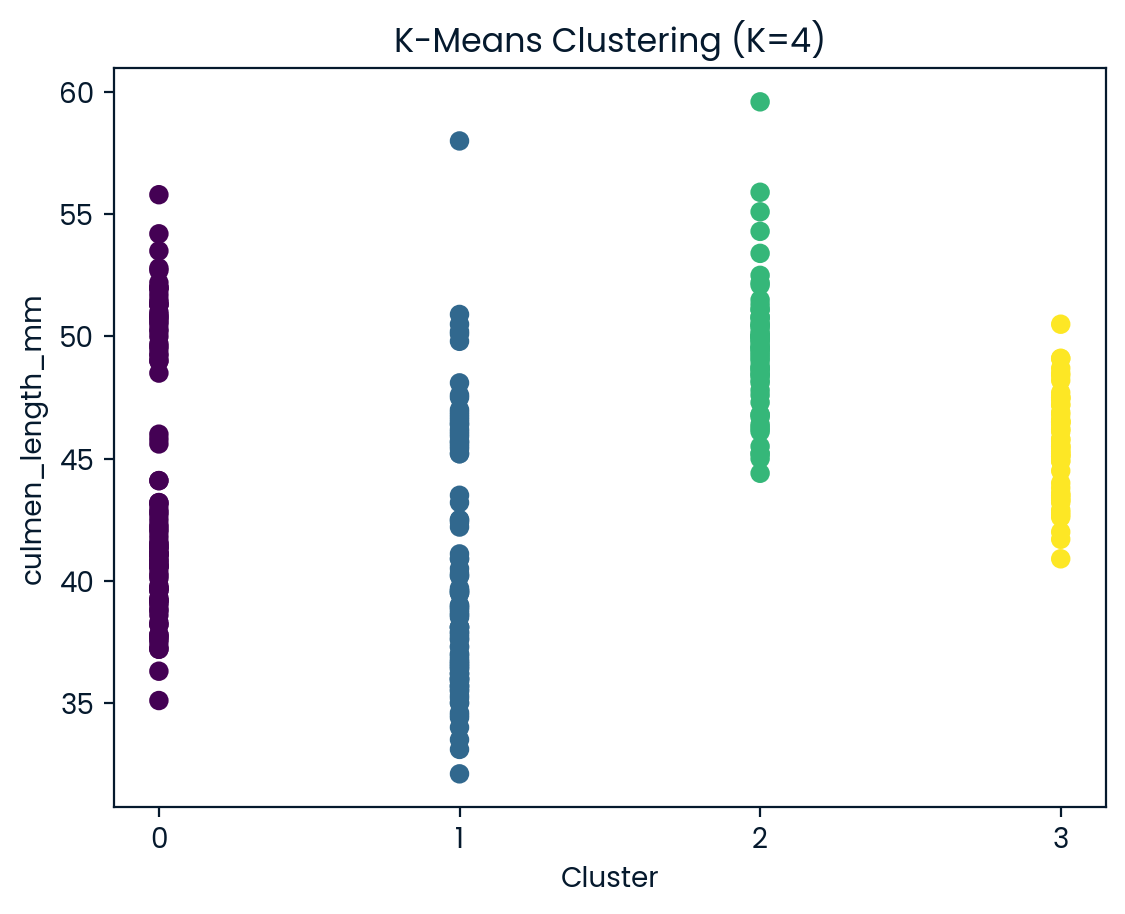

In [24]:
# Visualize Clusters 

plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis') 
plt.xlabel('Cluster') 
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1)) 
plt.title(f'K-Means Clustering (K={n_clusters})') 
plt.show()

In [25]:
# Stat_penguins DataFrame 
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label'] 
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,49.473770,15.718033,221.540984
3,45.563793,14.237931,212.706897
